<a href="https://colab.research.google.com/github/SalamThabet/A6MessageEncoder/blob/master/audioDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pip install librosa


In [0]:
import librosa
from librosa import display

data, sampling_rate = librosa.load('/content/drive/My Drive/AI/ML-project/ravdessDataset/03-01-01-01-01-01-01.wav')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


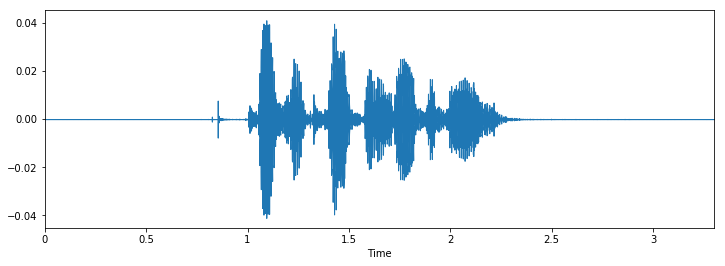

In [7]:
% pylab inline
import os
import pandas as pd
import glob 

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [19]:
import time

path = '/content/drive/My Drive/AI/ML-project/ravdessDataset/'
lst = []

start_time = time.time()

for subdir, dirs, files in os.walk(path):
  for file in files:
      try:
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=60).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        file = int(file[7:8]) - 1 
        arr = mfccs, file
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 81.4667067527771 seconds ---


In [0]:

# Creating X and y: zip makes a list of all the first elements, and a list of all the second elements.
X, y = zip(*lst)

In [0]:
import numpy as np
X = np.asarray(X)
y = np.asarray(y)


X.shape, y.shape

In [0]:
# Saving joblib files to not load them again with the loop above

import joblib

X_name = 'X.joblib'
y_name = 'y.joblib'
save_dir = '/content/drive/My Drive/AI/ML-project/ravdessDataset/Ravdess_model'

savedX = joblib.dump(X, os.path.join(save_dir, X_name))
savedy = joblib.dump(y, os.path.join(save_dir, y_name))

In [12]:
# Loading saved models

X = joblib.load('/content/drive/My Drive/AI/ravdessDataset/Ravdess_model/X.joblib')
y = joblib.load('/content/drive/My Drive/AI/ravdessDataset/Ravdess_model/y.joblib')

FileNotFoundError: ignored

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

NameError: ignored

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dtree = DecisionTreeClassifier()

In [16]:
dtree.fit(X_train, y_train)

NameError: ignored

In [0]:
predictions = dtree.predict(X_test)
print(predictions)

[0 2 2 3 2 3 3 2 2 0 2 0 0 0 3 2 3 2 3 3 2 3 3 0 0 2 0 2 3 2 2 3 3 2 3 3 3
 0 2 2 2 3 2 3 2 0 0 3 3 0 2 2 0 2 0 2 0 0 0 3 0 3 2 2 0 3 3 0 2 0 3 2 3 3
 2 3 3 3 3 2 3 3 0 3 3 3 2 2 0 0 0 2 0 2 3 2 3 2 0 3 3 3 0 2 3 0 3 3 3 2 3
 3 2 0 2 3 3 3 0 2 2 2 2 3 0 3 3 3 3 3 0 0 2 3 2 2 2 2 3 0 3 2 0 0 2 0 3]


In [0]:


from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.58      0.54      0.56        41
           2       0.58      0.59      0.59        49
           3       0.53      0.54      0.53        57

    accuracy                           0.56       147
   macro avg       0.56      0.56      0.56       147
weighted avg       0.56      0.56      0.56       147



In [0]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [0]:
x_traincnn.shape, x_testcnn.shape


((297, 40, 1), (147, 40, 1))

In [0]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(128, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)

Using TensorFlow backend.
W0620 06:21:06.882517 140502658897792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0620 06:21:06.933963 140502658897792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0620 06:21:06.943560 140502658897792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0620 06:21:07.014201 140502658897792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instea

In [0]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 40, 128)           768       
_________________________________________________________________
activation_1 (Activation)    (None, 40, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 5, 128)            82048     
_________________________________________________________________
activation_2 (Activation)    (None, 5, 128)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 128)            0         
__________

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

W0620 06:21:17.422198 140502658897792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0620 06:21:17.438595 140502658897792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=1000, validation_data=(x_testcnn, y_test))


W0620 06:21:22.551913 140502658897792 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 297 samples, validate on 147 samples
Epoch 1/1000
297/297 [==============================] - 1s 4ms/step - loss: 5.0246 - acc: 0.3704 - val_loss: 4.0784 - val_acc: 0.3333
Epoch 2/1000
297/297 [==============================] - 0s 595us/step - loss: 4.3905 - acc: 0.3906 - val_loss: 3.6982 - val_acc: 0.3946
Epoch 3/1000
297/297 [==============================] - 0s 598us/step - loss: 3.9642 - acc: 0.3704 - val_loss: 1.0511 - val_acc: 0.4898
Epoch 4/1000
297/297 [==============================] - 0s 605us/step - loss: 4.0975 - acc: 0.3771 - val_loss: 2.4832 - val_acc: 0.4014
Epoch 5/1000
297/297 [==============================] - 0s 573us/step - loss: 3.7031 - acc: 0.3872 - val_loss: 1.4312 - val_acc: 0.3741
Epoch 6/1000
297/297 [==============================] - 0s 616us/step - loss: 3.8659 - acc: 0.3838 - val_loss: 2.0023 - val_acc: 0.4286
Epoch 7/1000
297/297 [==============================] - 0s 578us/step - loss: 3.6070 - acc: 0.4074 - val_loss: 1.1069 - val_acc: 0.4014
Epoc

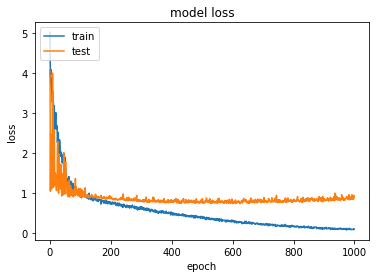

In [0]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

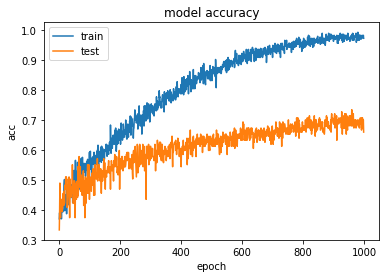

In [0]:
plt.plot(cnnhistory.history['acc'])
plt.plot(cnnhistory.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
predictions = model.predict_classes(x_testcnn)


In [0]:
predictions


array([0, 2, 2, 2, 2, 2, 3, 2, 3, 0, 3, 3, 3, 0, 0, 3, 2, 2, 3, 2, 3, 2,
       2, 0, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 0, 0, 2, 2, 2, 3, 3, 2, 2,
       2, 2, 0, 3, 2, 0, 2, 2, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 2, 2, 2, 0,
       2, 0, 2, 3, 0, 2, 2, 0, 2, 3, 3, 2, 3, 0, 2, 3, 3, 3, 2, 3, 2, 2,
       0, 3, 2, 2, 2, 3, 0, 2, 3, 2, 0, 3, 3, 2, 2, 3, 3, 0, 0, 0, 2, 2,
       3, 3, 3, 3, 2, 0, 2, 0, 3, 3, 3, 2, 3, 0, 2, 0, 3, 2, 3, 3, 0, 0,
       0, 0, 2, 3, 2, 2, 2, 0, 0, 0, 3, 3, 3, 3, 2])

In [0]:
y_test


array([3, 2, 0, 2, 0, 3, 3, 2, 3, 3, 2, 3, 0, 0, 0, 3, 2, 2, 3, 3, 0, 2,
       3, 0, 3, 2, 0, 2, 3, 2, 2, 3, 0, 2, 2, 0, 0, 2, 2, 3, 3, 3, 2, 2,
       2, 0, 0, 3, 2, 3, 2, 3, 0, 0, 0, 2, 3, 0, 0, 0, 3, 3, 2, 3, 2, 3,
       2, 0, 2, 0, 2, 2, 2, 0, 2, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3,
       0, 0, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 3, 0, 3, 0, 3, 2,
       3, 3, 3, 0, 2, 2, 2, 0, 0, 2, 3, 2, 2, 0, 0, 3, 3, 3, 2, 2, 0, 0,
       0, 0, 2, 3, 2, 2, 2, 0, 0, 0, 3, 0, 3, 3, 2])

In [0]:
new_Ytest = y_test.astype(int)


In [0]:
new_Ytest


array([3, 2, 0, 2, 0, 3, 3, 2, 3, 3, 2, 3, 0, 0, 0, 3, 2, 2, 3, 3, 0, 2,
       3, 0, 3, 2, 0, 2, 3, 2, 2, 3, 0, 2, 2, 0, 0, 2, 2, 3, 3, 3, 2, 2,
       2, 0, 0, 3, 2, 3, 2, 3, 0, 0, 0, 2, 3, 0, 0, 0, 3, 3, 2, 3, 2, 3,
       2, 0, 2, 0, 2, 2, 2, 0, 2, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3,
       0, 0, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 3, 0, 3, 0, 3, 2,
       3, 3, 3, 0, 2, 2, 2, 0, 0, 2, 3, 2, 2, 0, 0, 3, 3, 3, 2, 2, 0, 0,
       0, 0, 2, 3, 2, 2, 2, 0, 0, 0, 3, 0, 3, 3, 2])

In [0]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.59      0.64        41
           2       0.66      0.80      0.72        49
           3       0.63      0.60      0.61        57

    accuracy                           0.66       147
   macro avg       0.67      0.66      0.66       147
weighted avg       0.66      0.66      0.66       147



In [0]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(new_Ytest, predictions)
print (matrix)

[[24  5 12]
 [ 2 39  8]
 [ 8 15 34]]


In [0]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = '/content/drive/My Drive/AI/ravdessDataset/Ravdess_model'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/My Drive/AI/ravdessDataset/Ravdess_model/Emotion_Voice_Detection_Model.h5 


In [0]:
loaded_model = keras.models.load_model('/content/drive/My Drive/AI/ravdessDataset/Ravdess_model/Emotion_Voice_Detection_Model.h5')
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 40, 128)           768       
_________________________________________________________________
activation_1 (Activation)    (None, 40, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 5, 128)            82048     
_________________________________________________________________
activation_2 (Activation)    (None, 5, 128)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 128)            0         
__________

In [0]:
loss, acc = loaded_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

147/147 [==============================] - 0s 884us/step
Restored model, accuracy: 65.99%


In [0]:
from sklearn.ensemble import RandomForestClassifier


In [0]:
rforest = RandomForestClassifier(criterion="gini", max_depth=10, max_features="log2", 
                                 max_leaf_nodes = 100, min_samples_leaf = 3, min_samples_split = 20, 
                                 n_estimators= 22000, random_state= 5)

In [0]:
rforest.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='log2', max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=22000,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [0]:
predictions = rforest.predict(X_test)


In [0]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       1.00      0.09      0.16        34
           2       0.58      0.82      0.68        45
           3       0.59      0.69      0.64        68

    accuracy                           0.59       147
   macro avg       0.72      0.53      0.49       147
weighted avg       0.68      0.59      0.54       147

